In [38]:
# Import Necessary Programs Code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load CSV File

df_clean = pd.read_csv(f'D:/Promi/Project1_Group5_DataBootCamp/Data_Exploration_Dataset/ontario_property_data_2010_2023.csv')
df = pd.read_csv(f'D:/Promi/Project1_Group5_DataBootCamp/Data_Exploration_Dataset/ontario_property_data_2010_2023.csv')

In [40]:
# Basic cleaning steps:
# Step 1: Clean the data
# Step 2: Remove outliers using IQR for key numeric columns
# Step 3: Find the top 3 cities by average square footage
# Step 4: Find the top 3 cities by average number of bedrooms (including bathrooms)

In [41]:
# Step 1: Clean the data
df['Square Footage'] = df['Square Footage'].apply(lambda x: np.nan if x <= 0 else x)
df['Listing Price'] = df['Listing Price'].apply(lambda x: np.nan if x <= 0 else x)

In [42]:
# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['Square Footage', 'Listing Price', 'Number of Bedrooms', 'Number of Bathrooms'])

In [43]:
# Step 2: Remove outliers using IQR for key numeric columns
Q1 = df_clean[['Square Footage', 'Listing Price']].quantile(0.25)
Q3 = df_clean[['Square Footage', 'Listing Price']].quantile(0.75)
IQR = Q3 - Q1
df_clean = df_clean[~((df_clean[['Square Footage', 'Listing Price']] < (Q1 - 1.5 * IQR)) | 
                      (df_clean[['Square Footage', 'Listing Price']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [44]:
# Step 3: Find the top 3 cities by average square footage
top_3_cities_sqft = df_clean.groupby('Region/City')['Square Footage'].mean().sort_values(ascending=False).head(3).index
df_top_cities_sqft = df_clean[df_clean['Region/City'].isin(top_3_cities_sqft)][['Region/City', 'Square Footage', 'Number of Bedrooms', 'Number of Bathrooms', 'Listing Price']]

In [45]:
# Step 4: Find the top 3 cities by average number of bedrooms (including bathrooms)
# We'll calculate the total number of rooms by summing bedrooms and bathrooms.
df_clean['Total Rooms'] = df_clean['Number of Bedrooms'] + df_clean['Number of Bathrooms']
top_3_cities_bedrooms = df_clean.groupby('Region/City')['Total Rooms'].mean().sort_values(ascending=False).head(3).index
df_top_cities_bedrooms = df_clean[df_clean['Region/City'].isin(top_3_cities_bedrooms)][['Region/City', 'Square Footage', 'Number of Bedrooms', 'Number of Bathrooms', 'Listing Price']]

In [46]:
# Now include 'Total Rooms' in the filtered dataset for df_top_cities_bedrooms
df_top_cities_bedrooms = df_clean[df_clean['Region/City'].isin(top_3_cities_bedrooms)][['Region/City', 'Square Footage', 'Total Rooms', 'Listing Price']]

# Now calculate correlations

# Correlation between Square Footage and Listing Price for the entire dataset
print("Correlation between Square Footage and Listing Price (overall):")
corr_sqft_listing_price = df_clean[['Square Footage', 'Listing Price']].corr().iloc[0, 1]
print(corr_sqft_listing_price)

# Correlation for each of the top 3 cities by square footage
print("\nCorrelation between Square Footage and Listing Price by City:")
for city in df_top_cities_sqft['Region/City'].unique():
    corr_city = df_top_cities_sqft[df_top_cities_sqft['Region/City'] == city][['Square Footage', 'Listing Price']].corr().iloc[0, 1]
    print(f'{city}: {corr_city}')

# Correlation between Total Rooms (Bedrooms + Bathrooms) and Listing Price for the entire dataset
print("\nCorrelation between Total Rooms and Listing Price (overall):")
corr_rooms_listing_price = df_clean[['Total Rooms', 'Listing Price']].corr().iloc[0, 1]
print(corr_rooms_listing_price)

# Correlation for each of the top 3 cities by number of bedrooms (including bathrooms)
print("\nCorrelation between Total Rooms and Listing Price by City:")
for city in df_top_cities_bedrooms['Region/City'].unique():
    corr_city = df_top_cities_bedrooms[df_top_cities_bedrooms['Region/City'] == city][['Total Rooms', 'Listing Price']].corr().iloc[0, 1]
    print(f'{city}: {corr_city}')

Correlation between Square Footage and Listing Price (overall):
0.0039149636674

Correlation between Square Footage and Listing Price by City:
Guelph: -0.02313304302020893
Kitchener: 0.08110745285024203
Windsor: -0.015040755230117171

Correlation between Total Rooms and Listing Price (overall):
0.0010037641217840218

Correlation between Total Rooms and Listing Price by City:
Guelph: -0.014463049170216699
Toronto: 0.055826640379332625
Kitchener: 0.01753438874030808


In [47]:
# Display the two filtered datasets: top cities by square footage and top cities by number of bedrooms
print("Top 3 Cities by Square Footage:")
print(df_top_cities_sqft.head())
print("\nTop 3 Cities by Number of Bedrooms (Including Bathrooms):")
print(df_top_cities_bedrooms.head())

Top 3 Cities by Square Footage:
   Region/City  Square Footage  Number of Bedrooms  Number of Bathrooms  \
1       Guelph            1995                   3                    3   
4    Kitchener            1972                   1                    4   
5      Windsor             872                   2                    2   
7       Guelph            1662                   1                    2   
12     Windsor            1970                   5                    1   

    Listing Price  
1          874505  
4          878305  
5          779864  
7          574131  
12         681336  

Top 3 Cities by Number of Bedrooms (Including Bathrooms):
  Region/City  Square Footage  Total Rooms  Listing Price
1      Guelph            1995            6         874505
3     Toronto            1335            4         885112
4   Kitchener            1972            5         878305
7      Guelph            1662            3         574131
9     Toronto             971            4      

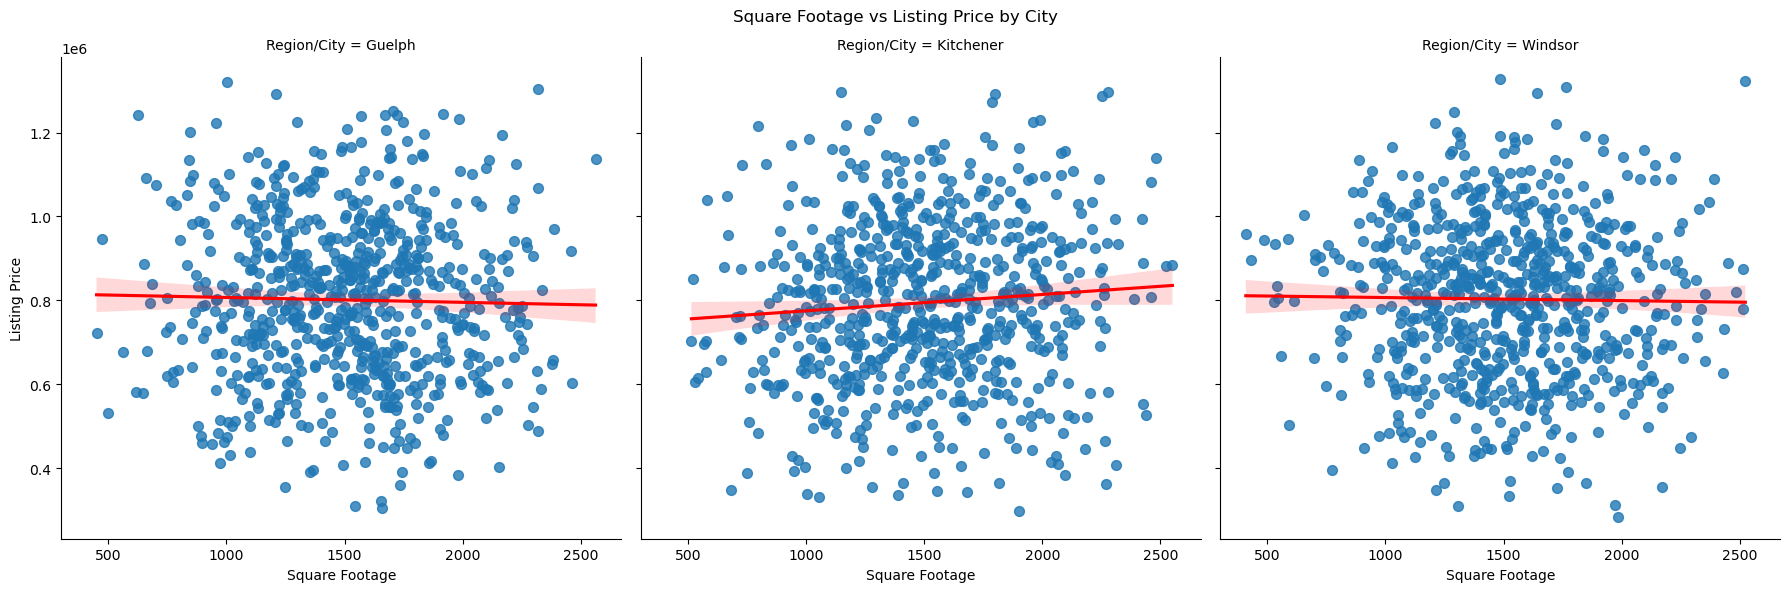

In [48]:
# Scatter plot with regression line for Square Footage vs Listing Price, separated by city
sns.lmplot(x='Square Footage', y='Listing Price', col='Region/City', data=df_top_cities_sqft, height=6, aspect=1, scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.subplots_adjust(top=0.9)
plt.suptitle('Square Footage vs Listing Price by City')
plt.show()

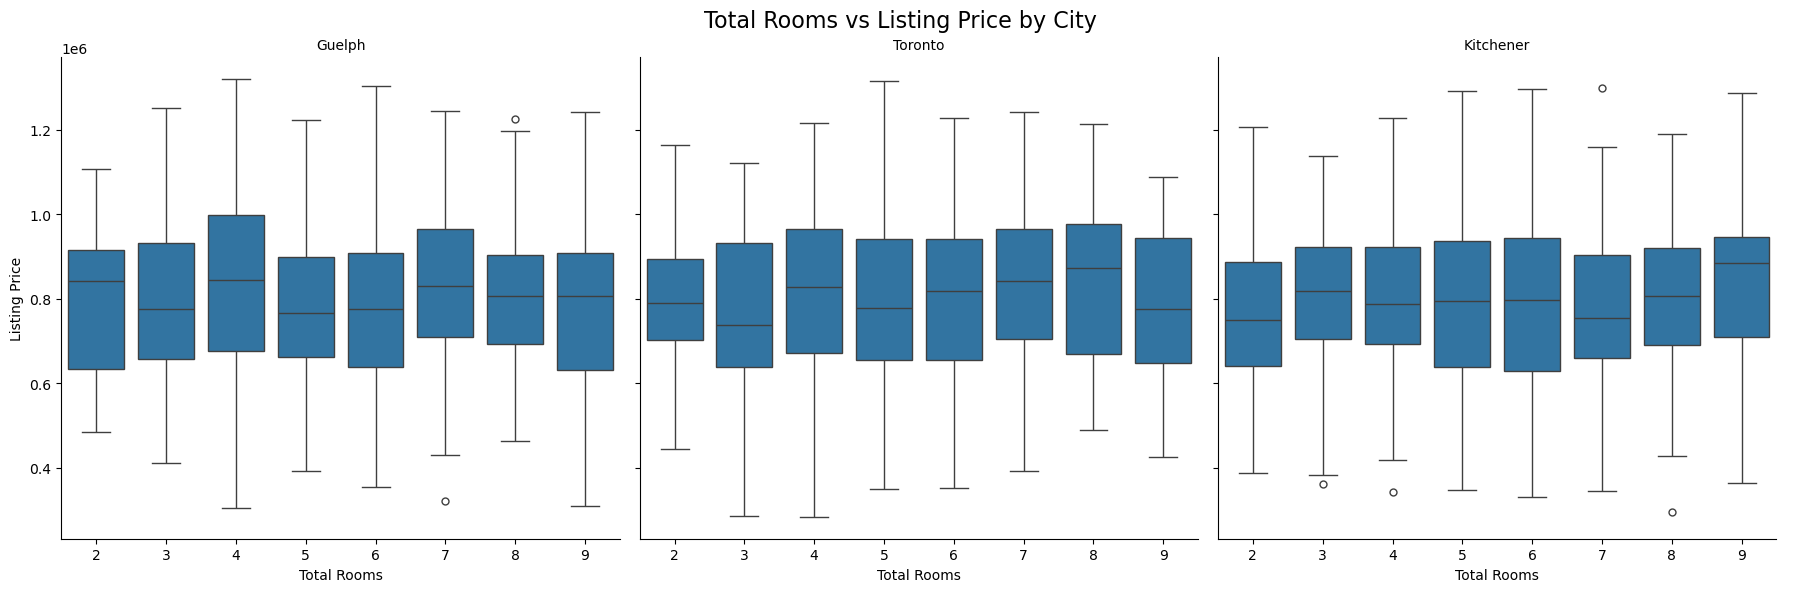

In [49]:
# Box plot for Total Rooms vs Listing Price, separated by city
g = sns.catplot(x='Total Rooms', y='Listing Price', col='Region/City', data=df_top_cities_bedrooms, kind='box', height=6, aspect=1)
g.set_titles("{col_name}")
g.set_axis_labels("Total Rooms", "Listing Price")
plt.subplots_adjust(top=0.9)
plt.suptitle('Total Rooms vs Listing Price by City', fontsize=16)
plt.show()